In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

after running with `THICKNESS_CONFIG = "ISOMIP"`

In [2]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('../simpleshelftest2/MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data
    new_thick.close()


In [3]:
make_thickness_file('INPUT/thickness_simpleshelf2_notfixed.nc')

open file and tweak it

In [4]:
old_thick = xr.open_dataset('INPUT/thickness_simpleshelf2_notfixed.nc')

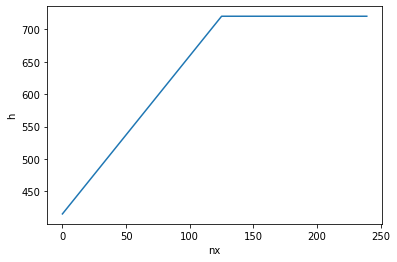

In [13]:
old_thick.h.sum('nz').isel(ny = 0).plot()

In [20]:
maxh = old_thick.h.sum('nz').isel(ny = 0).max().values
maxh

array(720.)

In [21]:
minh = old_thick.h.sum('nz').isel(ny = 0).min().values
minh

array(415.34575865)

In [19]:
old_thick.h.sum('nz').isel(ny = 0).values[125]

720.0

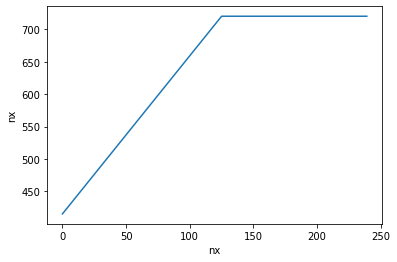

In [28]:
h_tot = old_thick.nx*(maxh-minh)/125+minh
h_tot[h_tot.nx > 124]=720
h_tot.plot()

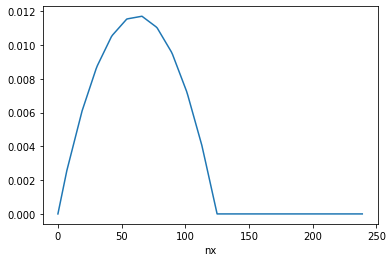

In [29]:
(h_tot - old_thick.h.sum('nz').isel(ny = 0)).plot()

In [48]:
old_thick.h.isel(ny = 0).sum('nz').diff('nx').values

array([2.43686632, 2.43686632, 2.43686632, 2.43686632, 2.43686632,
       2.43686632, 2.43687803, 2.43693701, 2.43693701, 2.43693701,
       2.43693701, 2.43693701, 2.43693701, 2.43693701, 2.43693701,
       2.43693701, 2.43693701, 2.43693701, 2.43696159, 2.43700771,
       2.43700771, 2.43700771, 2.43700771, 2.43700771, 2.43700771,
       2.43700771, 2.43700722, 2.43700772, 2.43700772, 2.43700772,
       2.43704518, 2.43707843, 2.43707843, 2.43707843, 2.43707843,
       2.43707843, 2.43707843, 2.43707843, 2.43707843, 2.43707843,
       2.43707843, 2.43707843, 2.4371288 , 2.43714913, 2.43714913,
       2.43714913, 2.43714913, 2.43714913, 2.43714913, 2.43714913,
       2.43714913, 2.43714913, 2.43714913, 2.43714913, 2.43721195,
       2.43721986, 2.43721986, 2.43721986, 2.43721986, 2.43721986,
       2.43721986, 2.43721986, 2.43721986, 2.43721986, 2.43721986,
       2.43722541, 2.43729057, 2.43729057, 2.43729057, 2.43729057,
       2.43729057, 2.43729057, 2.43729057, 2.43729057, 2.43729

(0.0972, 0.0976)

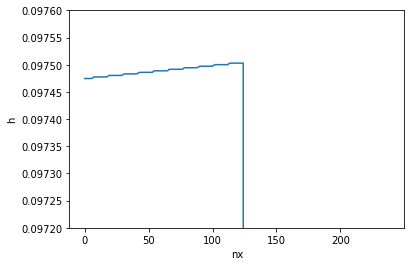

In [43]:
old_thick.h.isel(nz = 0,ny = 0).diff('nx').plot()
plt.ylim(0.0972,0.0976)

(0.0972, 0.0976)

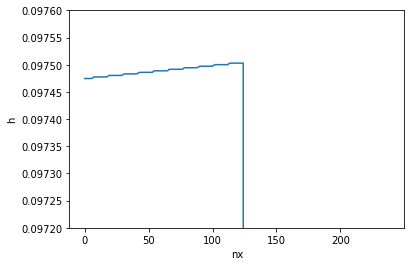

In [45]:
old_thick.h.isel(nz = -2,ny = 0).diff('nx').plot()
plt.ylim(0.0972,0.0976)

In [31]:
shelf_draft = xr.open_dataset('INPUT/ice_shelf.nc')
shelf_draft.thick.values

array([[350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ],
       [350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ],
       [350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ],
       ...,
       [350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ],
       [350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ],
       [350. , 347.2, 344.4, ...,   0. ,   0. ,   0. ]])

In [167]:
RHO_T0_S0 = 999.9106806711001
DRHO_DT = -0.0383569483 
DRHO_DS = 0.805876093 ## These are the same as ISOMIP Asay-Davis 2016 protocol

def find_density(temp,salt):
    rho = RHO_T0_S0 + DRHO_DT*temp + DRHO_DS*salt
    return rho

def ideal_salt(eta,h):
    centre_h = eta[:-1,:,:]-h/2
    ideal_salt = centre_h*(34.55-33.8)/(-720)+33.8
    return ideal_salt

In [168]:
rho_ice = 900
rho_0 = 1030
zos_estimate = -shelf_draft.thick*rho_ice/rho_0
bathy = xr.zeros_like(shelf_draft.thick)-720
n_levels = 25
eta_estimate = np.linspace(zos_estimate,bathy,n_levels + 1)
h_estimate = -np.diff(eta_estimate, axis = 0)
print(h_estimate)
salt_estimate = ideal_salt(eta_estimate,h_estimate)
rho_estimate = find_density(-1.9,salt_estimate)

[[[16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  ...
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]]

 [[16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  ...
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]
  [16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8       ]]

 [[16.56699029 16.66485437 16.76271845 ... 28.8        28.8
   28.8     

In [174]:
# now iterate
zos_old = zos_estimate
rho_old = rho_estimate
for i in np.arange(10):
    print(i)
    zos_new = -shelf_draft.thick*rho_ice/rho_old[0,:,:]
    print(np.max(np.abs(zos_old-zos_new).values))
    eta_new = np.linspace(zos_new,bathy,n_levels + 1)
    h_new = -np.diff(eta_new, axis = 0)
    salt_new = ideal_salt(eta_new,h_new)
    rho_new = find_density(-1.9,salt_new)
    zos_old = zos_new
    rho_old = rho_new

0
0.7483220411260731
1
0.00018368354210451798
2
4.508700612859684e-08
3
1.1027623258996755e-11
4
1.1368683772161603e-13
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0


In [175]:
mass_shelf = rho_ice*shelf_draft.thick
mass_disp = np.sum(h_new*rho_new,axis = 0)
mass_shelf-mass_disp

<xarray.DataArray 'thick' (ny: 40, nx: 240)>
array([[-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282],
       [-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282],
       [-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282],
       ...,
       [-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282],
       [-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282],
       [-109859.12646928, -114898.49346281, -119937.86529901, ...,
        -739817.54953282, -739817.54953282, -739817.54953282]])
Dimensions without coordinates: ny, nx

(2.445, 2.455)

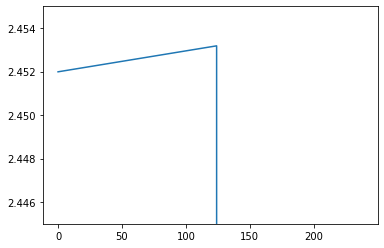

In [176]:
plt.plot(np.diff(eta_new[0,0,:]))
plt.ylim(2.445,2.455)

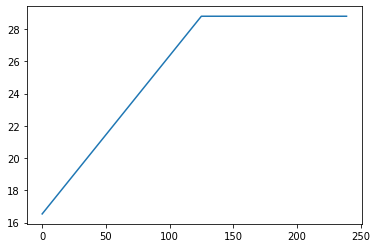

In [177]:
plt.plot((h_new[0,0,:]))

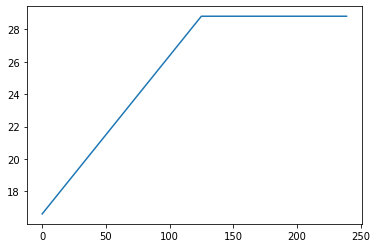

In [178]:
plt.plot(old_thick.h.isel(ny = 0,nz = 0))

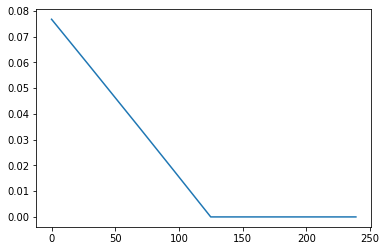

In [179]:
plt.plot(old_thick.h.isel(ny = 0,nz = 0)-h_new[0,0,:])

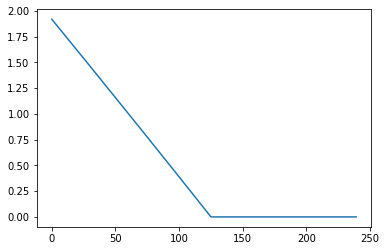

In [180]:
plt.plot(old_thick.h.isel(ny = 0).sum('nz')-np.sum(h_new[:,0,:],axis = 0))

In [162]:
(old_thick.h.isel(ny = 0).sum('nz')-np.sum(h_new[:,0,:],axis = 0))

<xarray.DataArray 'h' (nx: 240)>
array([1.91913977, 1.90401609, 1.88888279, 1.87373986, 1.85858731,
       1.84342513, 1.82825333, 1.81308361, 1.79796325, 1.78283326,
       1.76769365, 1.75254441, 1.73738554, 1.72221705, 1.70703893,
       1.69185118, 1.67665381, 1.66144681, 1.64623018, 1.6310285 ,
       1.61586332, 1.60068851, 1.58550408, 1.57031001, 1.55510632,
       1.539893  , 1.52467005, 1.50943698, 1.49419479, 1.47894297,
       1.46368152, 1.4484479 , 1.43323789, 1.41801826, 1.402789  ,
       1.3875501 , 1.37230158, 1.35704343, 1.34177565, 1.32649824,
       1.31121121, 1.29591454, 1.28060824, 1.26534268, 1.25008783,
       1.23482335, 1.21954924, 1.20426549, 1.18897212, 1.17366912,
       1.15835648, 1.14303422, 1.12770232, 1.11236079, 1.09700964,
       1.08171166, 1.06641197, 1.05110264, 1.03578368, 1.02045509,
       1.00511687, 0.98976901, 0.97441152, 0.9590444 , 0.94366765,
       0.92828127, 0.91289081, 0.89755587, 0.8822113 , 0.8668571 ,
       0.85149326, 0.83611979, 0.82073669, 0.80534396, 0.78994159,
       0.7745291 , 0.75910749, 0.74367624, 0.7282539 , 0.7128741 ,
       0.69748466, 0.68208559, 0.66667688, 0.65125854, 0.63583056,
       0.62039295, 0.60494571, 0.58948882, 0.57402182, 0.55854571,
       0.5430915 , 0.52766681, 0.5122325 , 0.49678854, 0.48133495,
       0.46587173, 0.45039887, 0.43491637, 0.41942377, 0.40392205,
...
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])
Dimensions without coordinates: nx

In [166]:
(old_thick.h.isel(ny = 0).sum('nz')-np.sum(h_new[:,0,:],axis = 0))/shelf_draft.thick.isel(ny = 0)

<xarray.DataArray (nx: 240)>
array([0.00548326, 0.00548392, 0.00548456, 0.00548519, 0.00548579,
       0.00548638, 0.00548695, 0.00548754, 0.00548829, 0.00548902,
       0.00548973, 0.00549043, 0.0054911 , 0.00549176, 0.0054924 ,
       0.00549302, 0.00549362, 0.0054942 , 0.00549476, 0.00549538,
       0.00549613, 0.00549687, 0.00549759, 0.00549828, 0.00549896,
       0.00549962, 0.00550025, 0.00550086, 0.00550145, 0.00550202,
       0.00550256, 0.00550322, 0.00550399, 0.00550473, 0.00550545,
       0.00550615, 0.00550683, 0.00550748, 0.00550811, 0.00550871,
       0.00550929, 0.00550984, 0.00551036, 0.00551107, 0.00551185,
       0.0055126 , 0.00551333, 0.00551404, 0.00551471, 0.00551536,
       0.00551598, 0.00551657, 0.00551713, 0.00551766, 0.00551816,
       0.00551894, 0.00551973, 0.0055205 , 0.00552123, 0.00552194,
       0.00552262, 0.00552326, 0.00552387, 0.00552445, 0.00552499,
       0.00552548, 0.00552597, 0.00552682, 0.00552764, 0.00552843,
       0.00552918, 0.00552989, 0.00553057, 0.00553121, 0.0055318 ,
       0.00553235, 0.00553285, 0.00553331, 0.00553384, 0.00553474,
       0.00553559, 0.00553641, 0.00553718, 0.00553791, 0.00553859,
       0.00553922, 0.0055398 , 0.00554031, 0.00554075, 0.00554113,
       0.00554175, 0.00554272, 0.00554364, 0.00554451, 0.00554533,
       0.00554609, 0.00554678, 0.0055474 , 0.00554793, 0.00554838,
...
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])
Dimensions without coordinates: nx

In [138]:
np.max(old_thick.h.isel(ny = 0,nz = 0)-h_new[0,0,:])

<xarray.DataArray 'h' ()>
array(0.07676559)

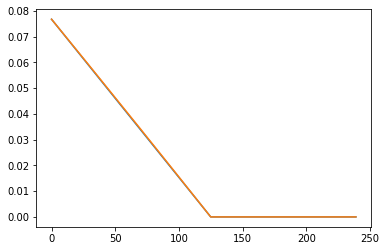

In [141]:
correction = -np.max(old_thick.h.isel(ny = 0,nz = 0)-h_new[0,0,:])/125*old_thick.nx+np.max(old_thick.h.isel(ny = 0,nz = 0)-h_new[0,0,:])
correction[old_thick.nx>124]=0
plt.plot(correction)
#plt.plot(old_thick.h.isel(ny = 0,nz = 0)-h_new[0,0,:])

In [146]:
ds_h = old_thick.h*0+h_new+correction.values
ds_h.to_netcdf('INPUT/thickness_simpleshelf2_test.nc')

plot test config

In [147]:
ave = False ## True means use 5 daily average rather than hourly prog
def open_files():
    if ave:
        prog = xr.open_dataset(base + 'ave_prog.nc')
    else:
        prog = xr.open_dataset(base + 'prog.nc')
    ocean_static = xr.open_dataset(base + "ocean_geometry.nc")
    return prog, ocean_static
def open_IC():
    IC = xr.open_dataset(base + 'MOM_IC.nc')
    return IC
def open_Initialstate():
    IC = xr.open_dataset(base + 'Initial_state.nc')
    return IC
def open_mom(folder):
    base = folder
    IC = xr.open_dataset(base + '/mom.nc')
    return IC
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog, ocean_static = open_files()
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = folder
    label = folder
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) #Dummy, just for have z_levels
    # plot variable in colours
    xi, yyi = np.meshgrid(xx[yy0,:], yi) #We repeat the horizontal part of the grid by the number of zlevels
    #cax = ax.contourf(xi,yy[tt,...],dataplot[tt,:,yy0,:],levels = levels, cmap = cmap, extend = 'both',corner_mask = False)
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


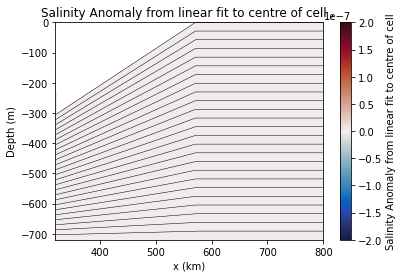

In [148]:
## use IC 

base = ''
folder = ''
fig, ax = plt.subplots()
prog, ocean_static = open_files()
IC = open_IC()
x = -1
time = 0
ymax = 720

# calculate ideal salt from linear fit to centre of cell depth
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-720) + 33.8

# plot salinity anomaly
plot(ax,x,time,0,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell",-0.0000002,0.0000002,cm.cm.balance,ymax)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_53505/3728339448.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


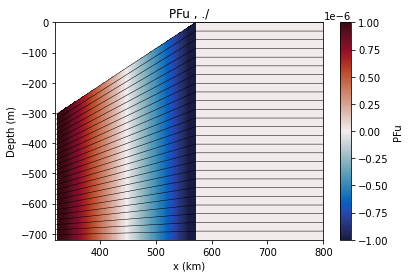

In [158]:
label = './'
mom = open_mom(label)
folder = label

fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"PFu",-1e-6,1e-6,cm.cm.balance,ymax)

0001-01-01 00:05:00


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_53505/3728339448.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


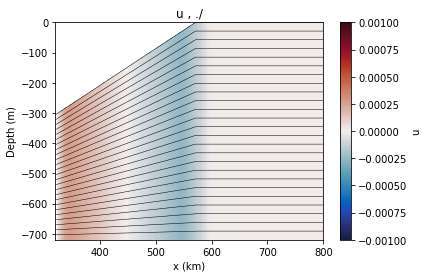

In [155]:
label = './'
prog, ocean_static = open_files()
folder = label

fig,axes = plt.subplots()
time = 0 
print(prog.isel(Time = time).Time.values)
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,prog.u,"u",-1e-3,1e-3,cm.cm.balance,ymax)